In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import csv

cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
breath = 'negative positive'.split()
for b in breath:
    pathlib.Path(f'saved_image/{b}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./drive/MyDrive/breath/{b}'):
        songname = f'./drive/MyDrive/breath/{b}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'saved_image/{b}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

file = open('bbreath_dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
breath = 'negative positive'.split()
for b in breath:
    for filename in os.listdir(f'./drive/MyDrive/breath/{b}'):
        songname = f'./drive/MyDrive/breath/{b}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse=librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {b}'
        file = open('bbreath_dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())


KeyboardInterrupt: ignored

<Figure size 576x576 with 0 Axes>

In [ ]:

import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
import csv
import tensorflow as tf
import time
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


data = pd.read_csv('/content/drive/MyDrive/bbreath_dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
data_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(data_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
start = time.time()
#create, train and save the model
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.save('breath.model')

#Predit the audio and give the result



classifier = model.fit(X_train, y_train, epochs=100, batch_size=128)
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: ')
print(test_accuracy[1])




INFO:tensorflow:Assets written to: breath.model/assets
Epoch 1/100
1/1 [==============================] - 1s 597ms/step - loss: 0.9025 - accuracy: 0.2697
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8694 - accuracy: 0.2809
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8430 - accuracy: 0.2809
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8228 - accuracy: 0.3146
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8071 - accuracy: 0.3596
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7949 - accuracy: 0.4270
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7861 - accuracy: 0.4382
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7787 - accuracy: 0.4494
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7720 - accuracy: 0.4944
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - lo

No Skill ROC AUC 0.436
ANN ROC AUC 0.804


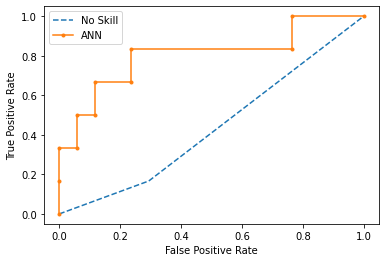

In [ ]:
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
los_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(y_test, los_probs)
print('ANN ROC AUC %.3f' % roc_auc)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_fpr, ns_tpr, _ = roc_curve(y_test, pos_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, los_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ANN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()